In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get Data

In [5]:
df= pd.read_csv('supermarket.csv')

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
df.shape

(9800, 18)

# Data Cleaning

In [8]:
df.isnull().sum()/df.shape[0]*100
df=df.fillna(method="ffill")
df.isnull().sum()/df.shape[0]*100

Row ID           0.0
Order ID         0.0
Order Date       0.0
Ship Date        0.0
Ship Mode        0.0
Customer ID      0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Postal Code      0.0
Region           0.0
Product ID       0.0
Category         0.0
Sub-Category     0.0
Product Name     0.0
Sales            0.0
dtype: float64

In [10]:
import pandas as pd

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y', errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y', errors='coerce')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

<Axes: xlabel='Segment', ylabel='count'>

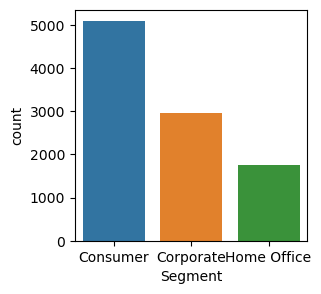

In [12]:
plt.figure(figsize=(3,3))
sns.countplot(x='Segment',data=df)

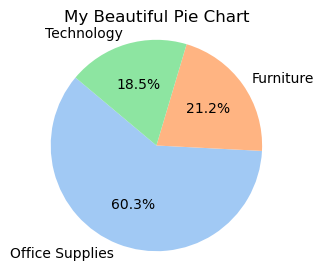

In [13]:
category_counts = df['Category'].value_counts()
# Let's take the category
categories = category_counts.index.tolist() 
# Let's take the count values of each category
counts = category_counts.values.tolist()

colors = sns.color_palette('pastel')[0:4]  # Using Seaborn's pastel color palette

# Create pie chart
plt.figure(figsize=(3, 3))
plt.pie(counts, labels=categories, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('My Beautiful Pie Chart')

# Show the plot
plt.show()

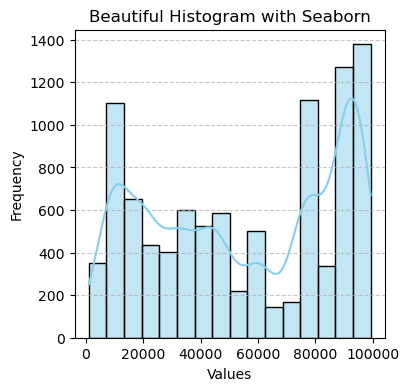

In [14]:
plt.figure(figsize=(4, 4))
sns.histplot(data=df['Postal Code'], kde=True, color='skyblue')
plt.title('Beautiful Histogram with Seaborn')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

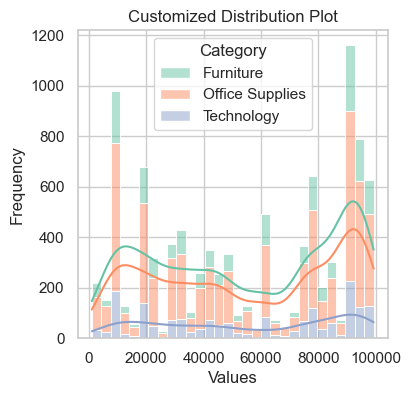

In [15]:
# Plotting a customized distplot using Seaborn
plt.figure(figsize=(4, 4))
sns.set(style="whitegrid")  # Setting Seaborn style

# Creating the distplot
sns.histplot(data=df, x='Postal Code', kde=True, hue='Category', palette='Set2', multiple='stack', bins=30)
plt.title('Customized Distribution Plot')
plt.xlabel('Values')
plt.ylabel('Frequency')
# Show the plot
plt.show()


<Figure size 400x400 with 0 Axes>

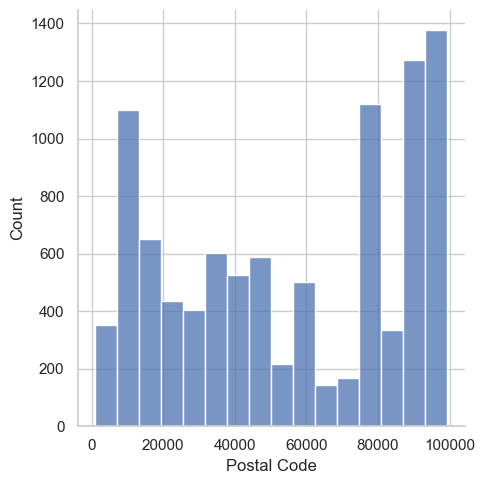

In [17]:
plt.figure(figsize=(4, 4))
sns.displot(df['Postal Code'])

<Axes: >

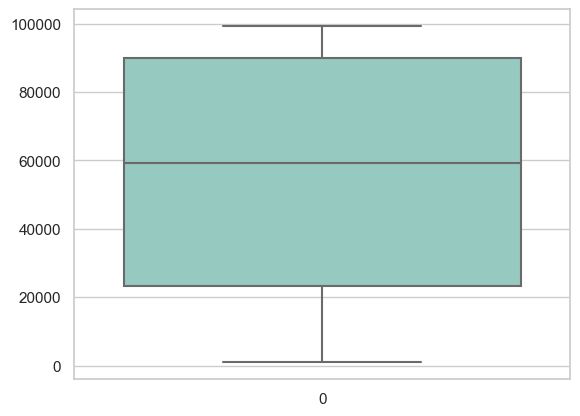

In [18]:
sns.boxplot(df['Postal Code'],palette='Set3')

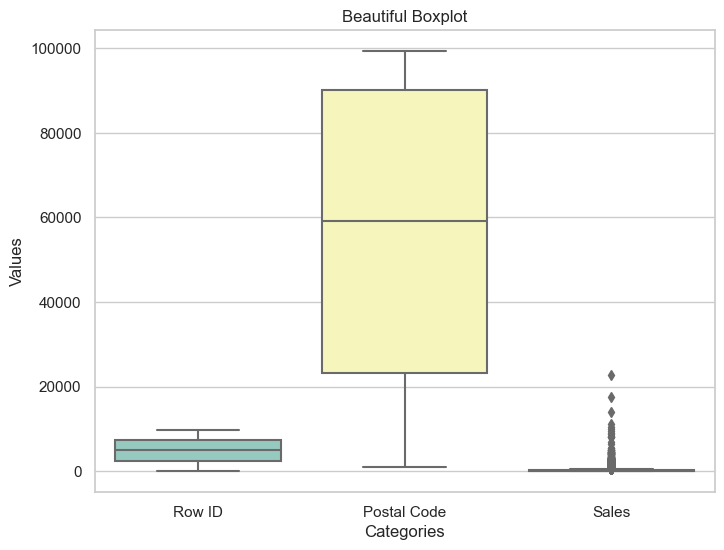

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, palette='Set3')
plt.title('Beautiful Boxplot')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()


<Axes: xlabel='Postal Code', ylabel='Sales'>

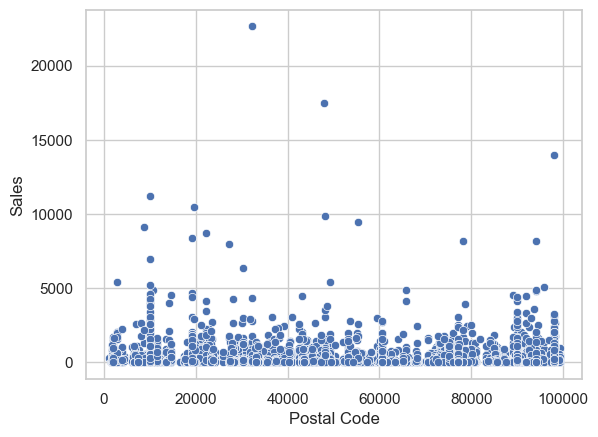

In [20]:
sns.scatterplot(data=df, x='Postal Code', y='Sales')

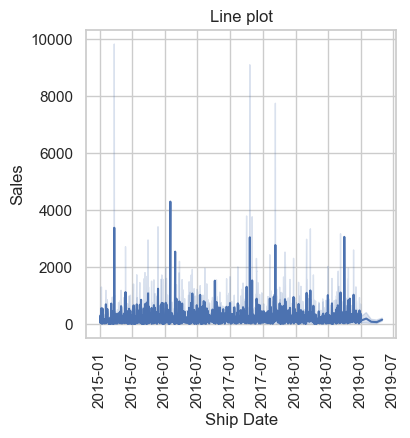

In [21]:
plt.figure(figsize=(4, 4))
sns.lineplot(data=df, x='Ship Date', y='Sales')
sns.set(style="darkgrid")
plt.title('Line plot')
plt.xticks(rotation=90) 
plt.show()

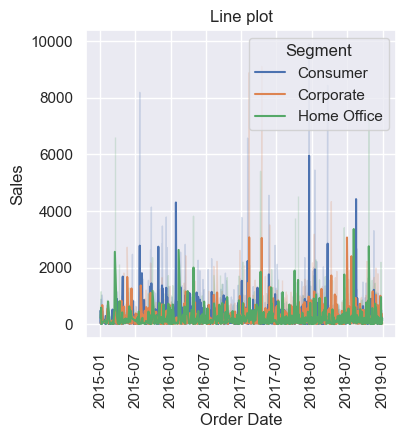

In [25]:
plt.figure(figsize=(4, 4))
sns.lineplot(x="Order Date",y="Sales",data=df,hue="Segment")
sns.set(style="darkgrid")
plt.title('Line plot')
plt.xticks(rotation=90) 
plt.show()


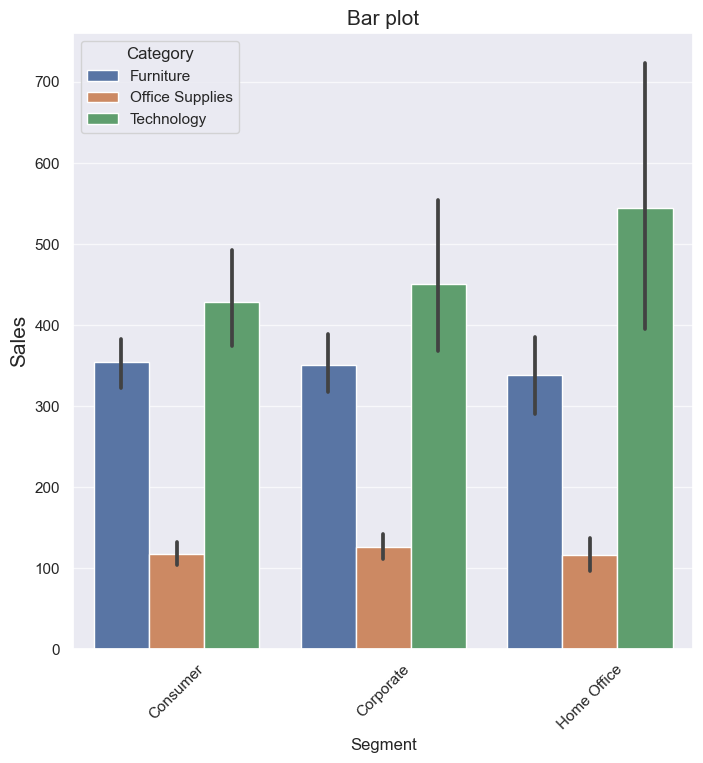

In [23]:
plt.figure(figsize=(8, 8))
sns.barplot(x="Segment",y="Sales",data=df,hue="Category")
plt.title("Bar plot",fontsize=15)
plt.xlabel("Segment",fontsize=12)
plt.ylabel("Sales",fontsize=15)
ax = plt.gca()
ax.grid(True, axis='y', linestyle='-', alpha=0.7) 
plt.xticks(rotation=45) 
plt.show()



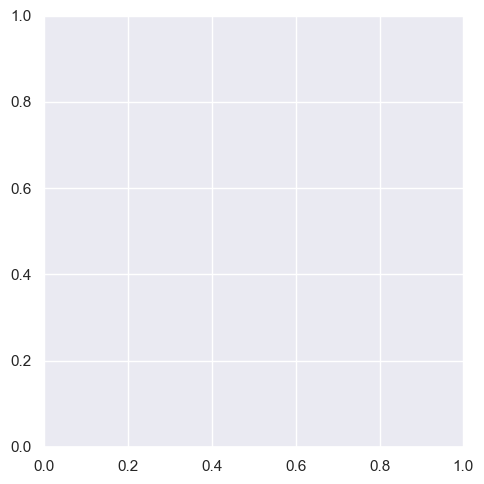

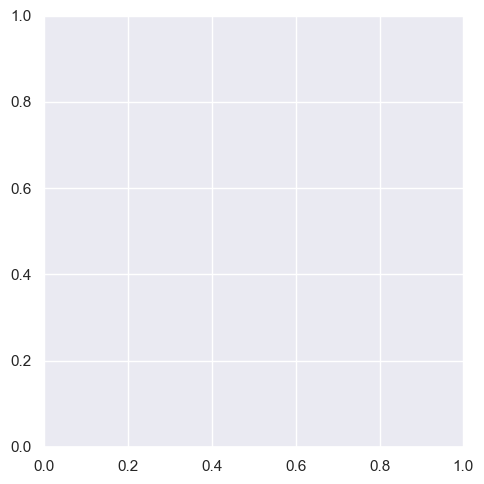

In [27]:
sns.displot(df[df['Category']==0]['Postal Code'],hist=False)
sns.displot(df[df['Category']==1]['Sales'],hist=False)

<Axes: xlabel='Ship Mode', ylabel='Category'>

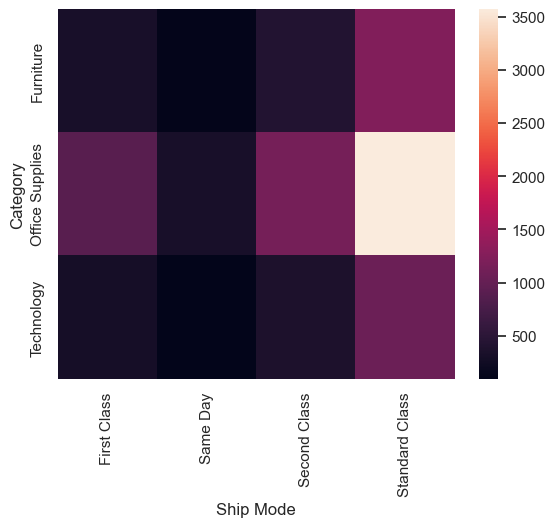

In [28]:
sns.heatmap(pd.crosstab(df['Category'],df['Ship Mode']))

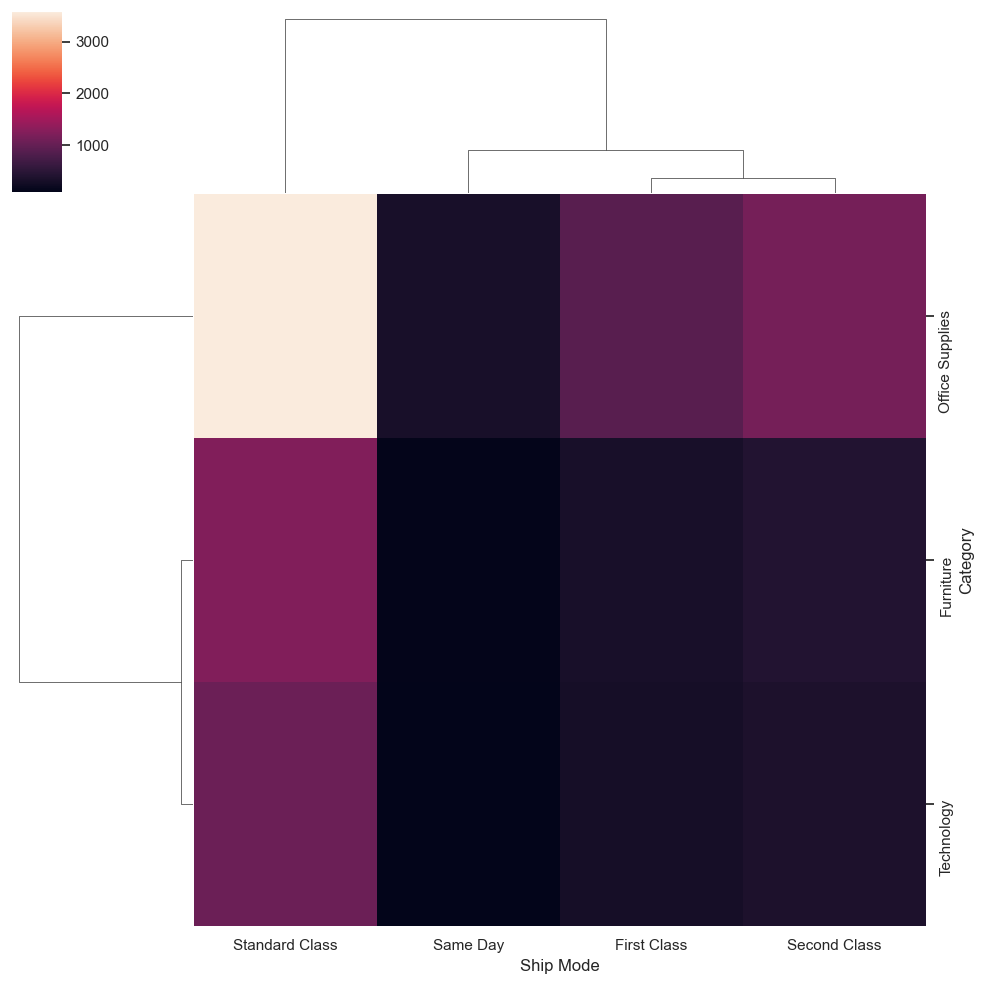

In [29]:
sns.clustermap(pd.crosstab(df['Category'],df['Ship Mode']))

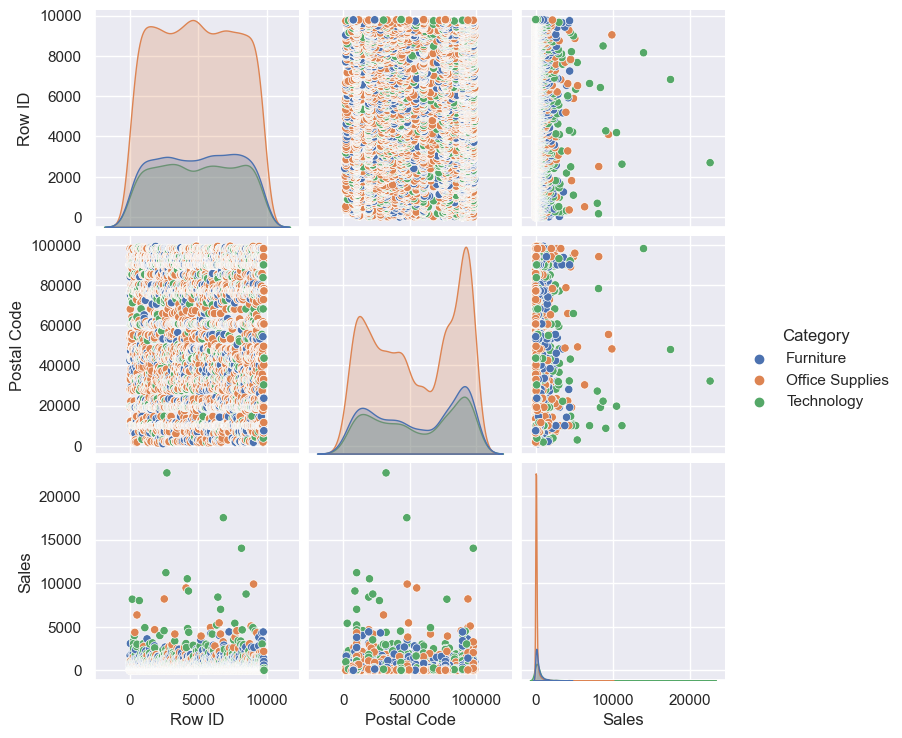

In [30]:
sns.pairplot(df,hue='Category')